# Group 3-B R GARCH Model Analysis of Apple Stock Price
#### Micheal Lucky (smgmol56@gmail.com) 
#### Yonas Menghis Berhe (yonix500@gmail.com)
#### Boluwatife Adeyeye (adeyeyebolu027@gmail.com)
#### Muhammed Jamiu Saka (sakasim_jay@yahoo.com)
#### Sola-Aremu Oluwapelumi (solaaremu.pelumi@gmail.com)

In [20]:
#import the necessary libraries
library(tidyverse)
library(quantmod)
library(rugarch)
library(forecast)
library(tseries)
library(lmtest)
library(zoo)
library(fBasics)

In [21]:
#import the data from Yahoo Finance
getSymbols('AAPL', src='yahoo')

[1] "AAPL"

In [3]:
#Displays the head of the time series
head(AAPL)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2007-01-03  12.32714  12.36857 11.70000   11.97143   309579900      10.39169
2007-01-04  12.00714  12.27857 11.97429   12.23714   211815100      10.62234
2007-01-05  12.25286  12.31428 12.05714   12.15000   208685400      10.54669
2007-01-08  12.28000  12.36143 12.18286   12.21000   199276700      10.59878
2007-01-09  12.35000  13.28286 12.16429   13.22429   837324600      11.47922
2007-01-10  13.53571  13.97143 13.35000   13.85714   738220000      12.02857

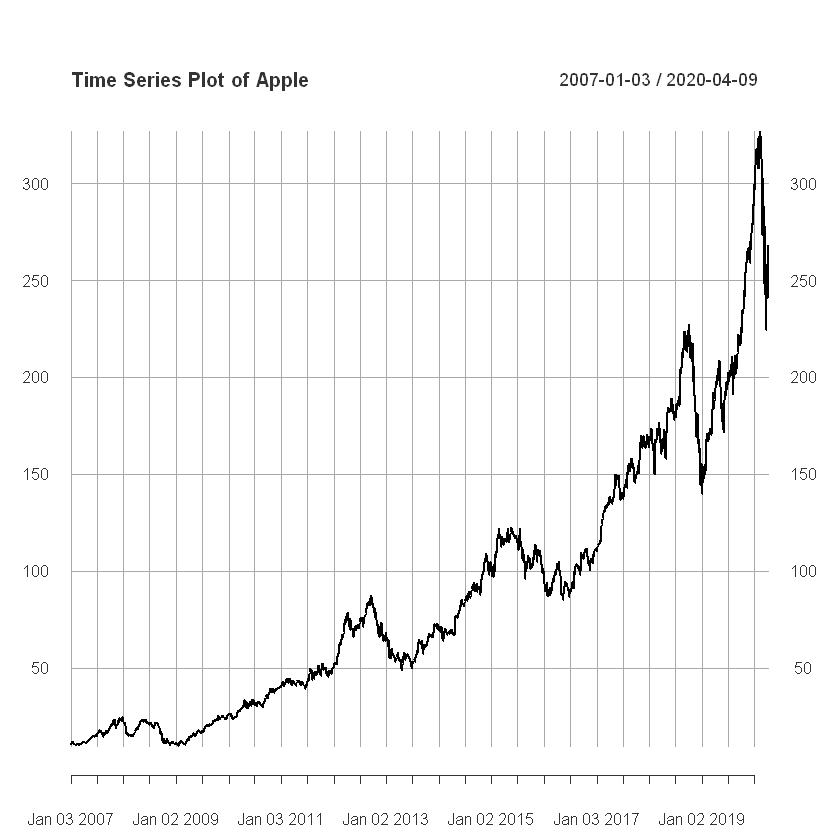

In [4]:
#display a plot of the time series
plot(AAPL[,'AAPL.Adjusted'], main='Time Series Plot of Apple', ylab='Adjusted Closing Price of Stock', xlab='Time (in days)')

#### Observing the graph indicates that the time series is non-stationary with varying mean.

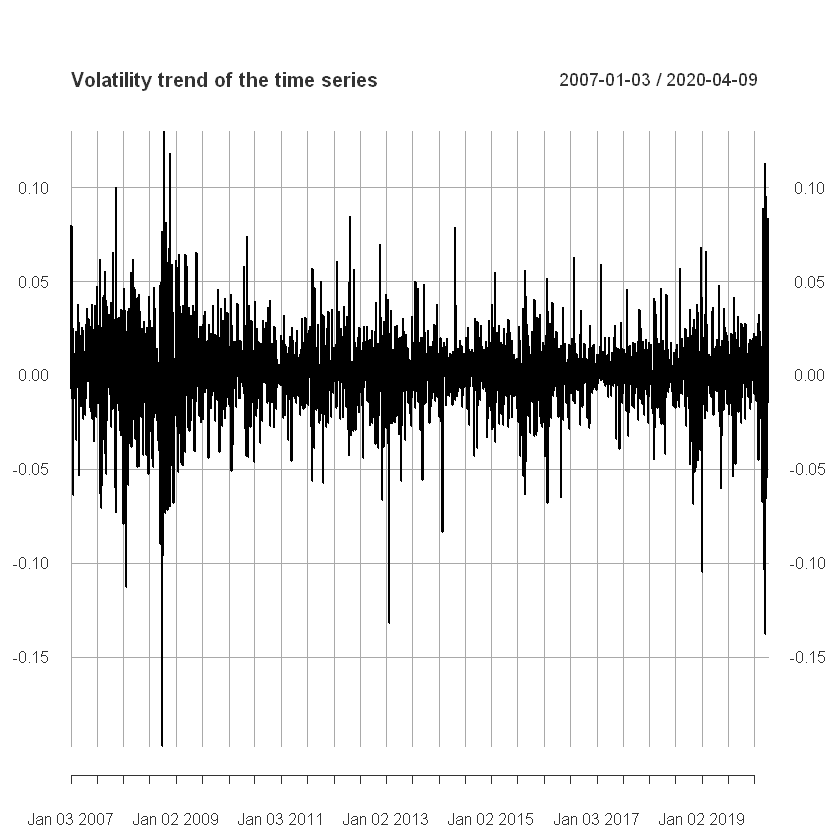

In [5]:
plot(diff(log(AAPL[,'AAPL.Adjusted'])), main="Volatility trend of the time series")

#### This plot displays that the time series exhibits volatility and persistence

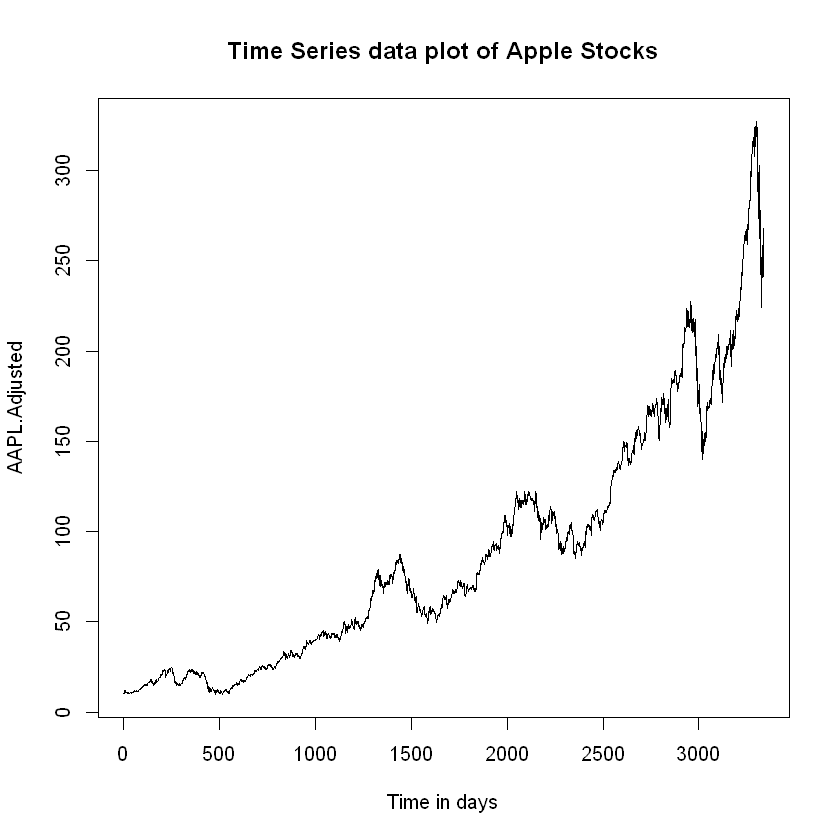

In [7]:
#Converting to a time series for ease of dealing with
AAPL_ts=ts(AAPL[,'AAPL.Adjusted'], frequency=1, start=0)
plot(AAPL_ts,  main="Time Series data plot of Apple Stocks", xlab="Time in days")

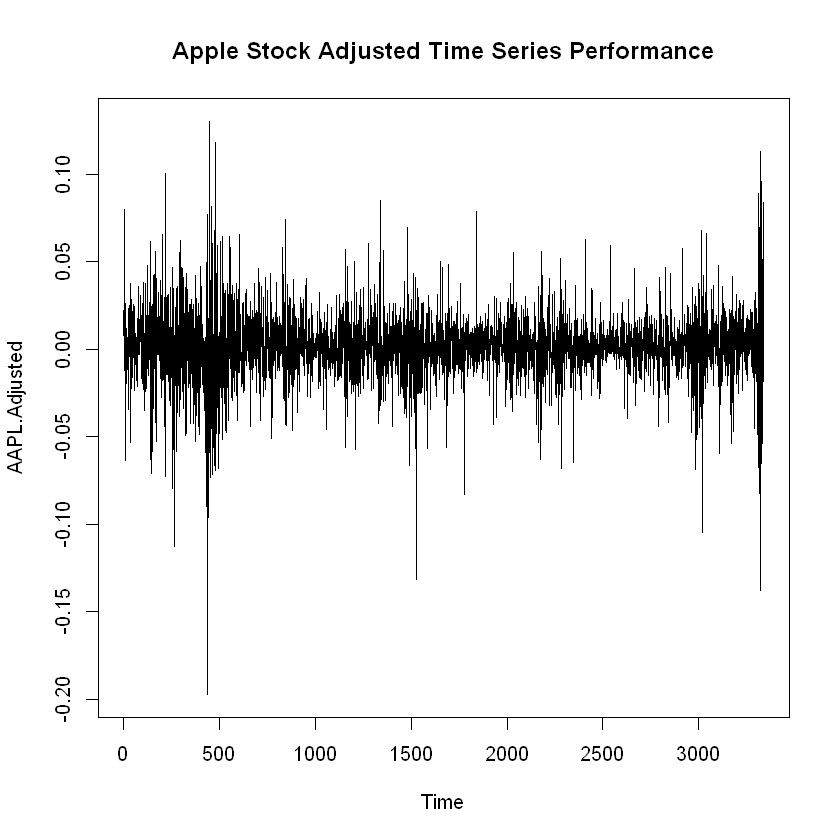

In [8]:
#Converting to log-Diff since the series is not stationary and plotting
AAPL_ts_log = diff(log(AAPL_ts))
plot(AAPL_ts_log, main="Apple Stock Adjusted Time Series Performance")

### We notice that the time series experiences significant volatility hence, there is a chance it would benefit from a GARCH model

### In order to fit an appropriate GARCH model, we need to carry out a ACF and PACF analysis of the time series.

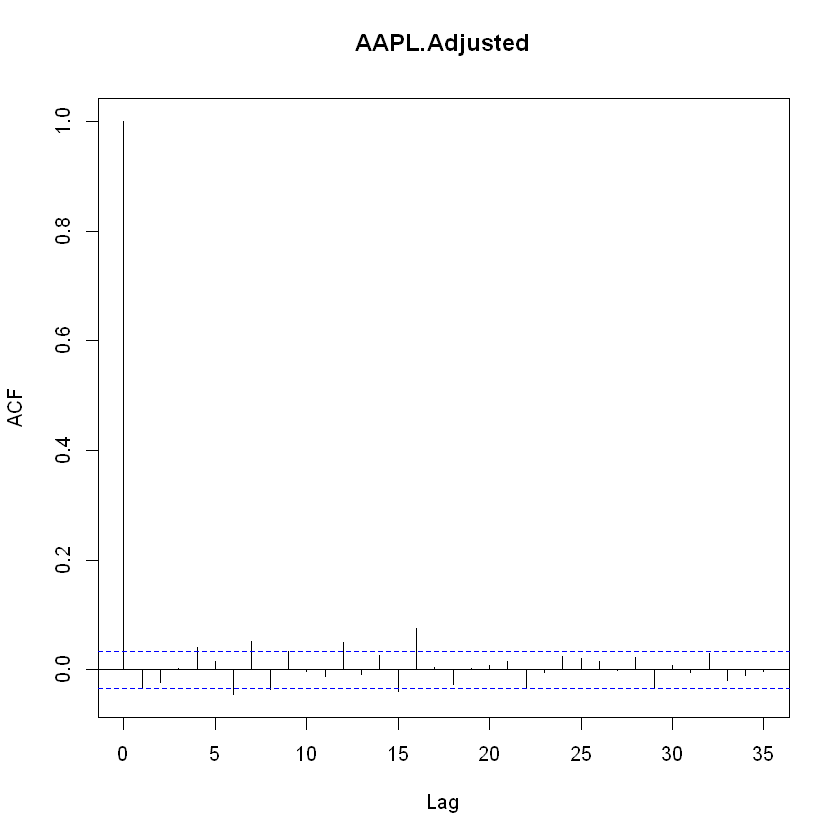

In [9]:
acf(AAPL_ts_log)

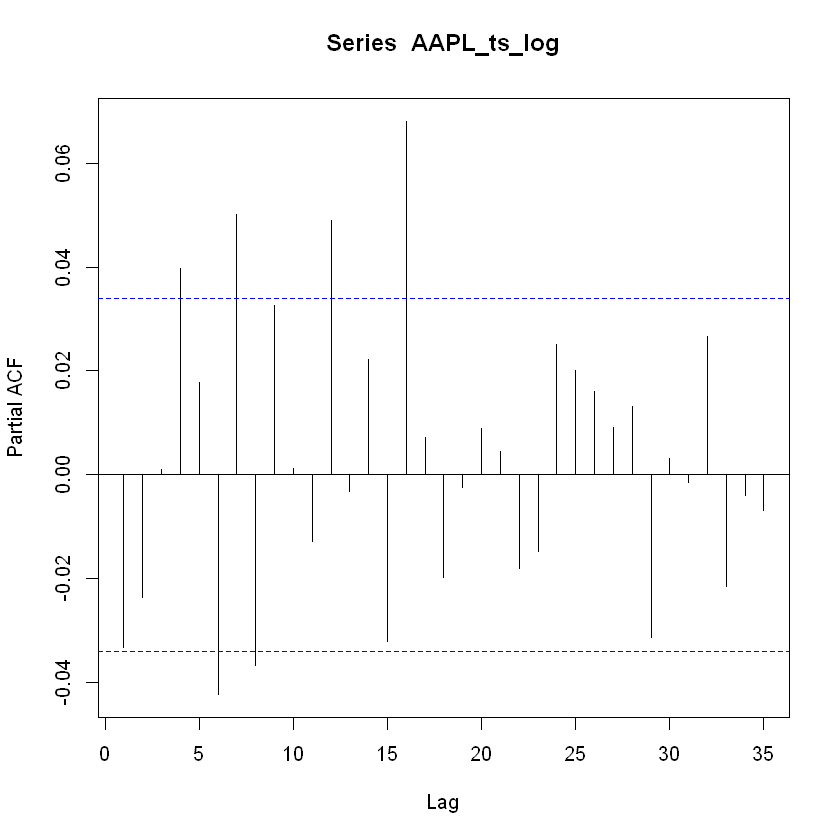

In [10]:
pacf(AAPL_ts_log)

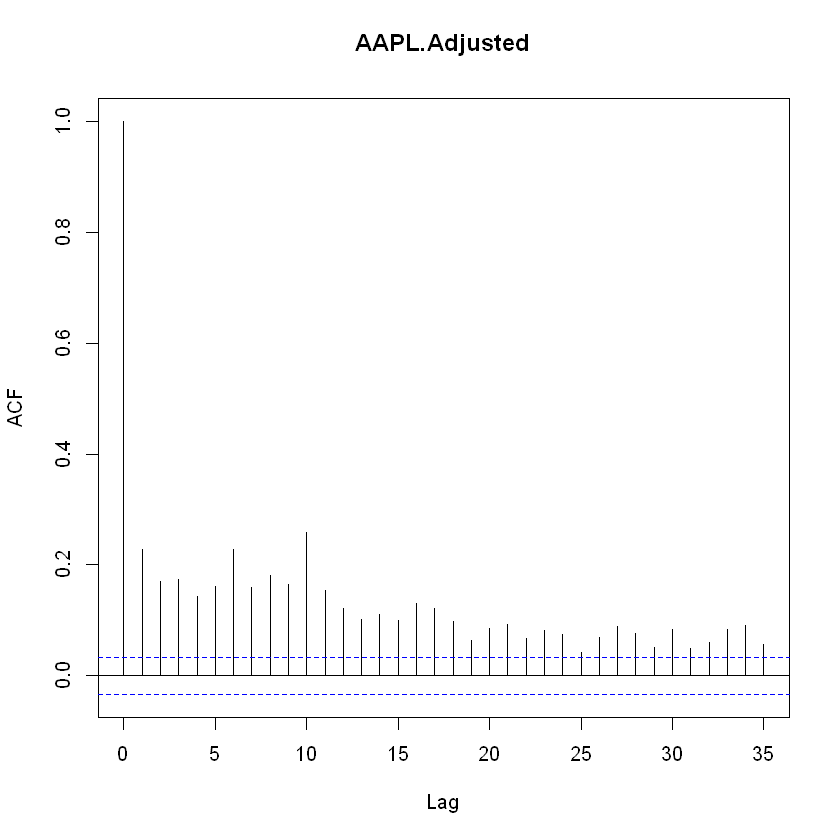

In [13]:
### inspection of the squared also yields
acf(AAPL_ts_log^2)

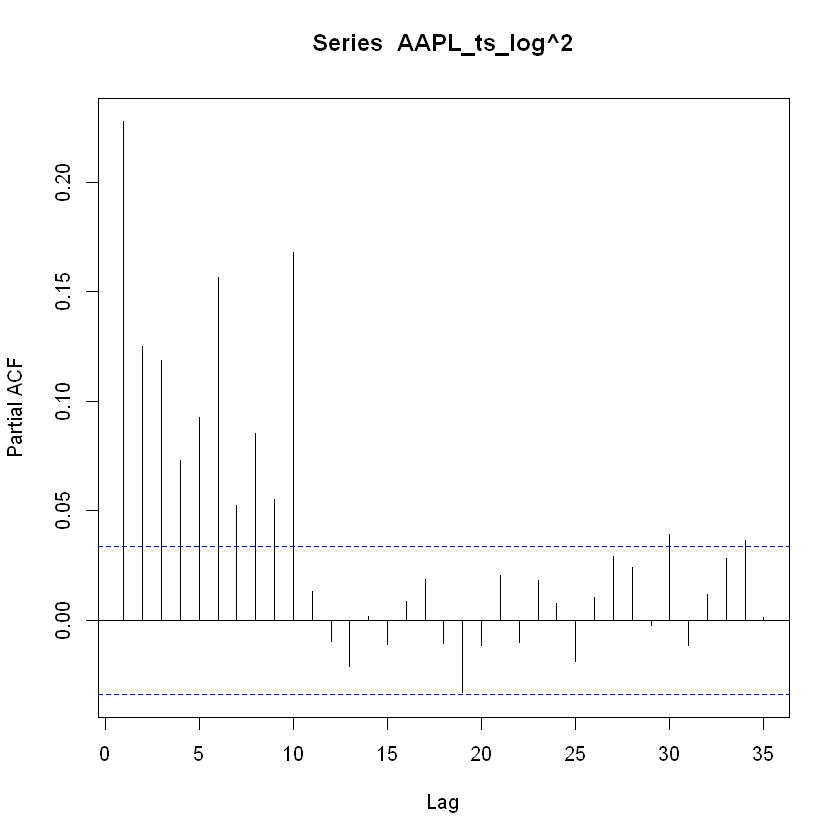

In [14]:
pacf(AAPL_ts_log^2)

#### The initial huge decay in the ACF curve is indicative that an ARMA model of 1 can capture the variance in the time series.
#### The Lag in the residuals plot persists which is quite indicative of expected behaviour.
#### We use the garch module to explore which garch model would be best for decribing the volatility in the time series

In [24]:
#Checking for a suitable GARCH model to use
garch(x=AAPL_ts_log,grad="numerical",trace=FALSE)


Call:
garch(x = AAPL_ts_log, grad = "numerical", trace = FALSE)

Coefficient(s):
       a0         a1         b1  
0.0003421  0.0500001  0.0500000  


#### The test confirms that a garch 1,1 model is suitable

# Model Fitting

### 1. GARCH (1,1) Model with normally distributed errors

In [22]:
garch11.spec = ugarchspec(variance.model=list(garchOrder=c(1,1)), mean.model=list(armaOrder=c(0,0)))
#Estimate the model
garch11.fit = ugarchfit(spec=garch11.spec, data=AAPL_ts_log)
garch11.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001855    0.000270   6.8808        0
omega   0.000014    0.000002   9.0459        0
alpha1  0.113564    0.001821  62.3633        0
beta1   0.853263    0.009360  91.1643        0

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001855    0.000359   5.1624 0.000000
omega   0.000014    0.000005   2.9990 0.002709
alpha1  0.113564    0.022238   5.1067 0.000000
beta1   0.853263    0.015317  55.7060 0.000000

LogLikelihood : 8722.727 

Information Criteria
------------------------------------
                    
Akaike       -5.2208
Bayes        -5.2135
Shibata      -5.2208
Hannan-Quinn -5.2182

Weig

#### Residual Diagnostics: Ljung Box tests for white noise behaviour in residuals. Since the residuals have p-values>0.05 and we fail to reject the null hypothesiis, there is no eveidence of autocorrelation in the residuals. Hence, we may conclude that the residuals behave as white noise

#### Test for ARCH behaviour in residuals: Analysing the standardized squared residuals and ARCH LM tests, the p-values> 0.05 and we fail to reject the null hypothesis. Hence, there is no evidence of serial correlation in squared residuals. This confirms that the residuals behave as a white noise process

#### Looking at the output for the goodness of fit test, since the p-values>0.05, the normal distribution assumption is strongly rejected

### 2. GARCH (1,1) Model with t-distribution

In [31]:
garch11.t.spec = ugarchspec(variance.model=list(garchOrder=c(1,1)), mean.model=list(armaOrder=c(0,0)), distribution.model="std")
#Estimate the model
garch11.t.fit = ugarchfit(spec=garch11.t.spec, data=AAPL_ts_log)
garch11.t.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001602    0.000246   6.5164 0.000000
omega   0.000007    0.000004   2.0959 0.036095
alpha1  0.100853    0.013905   7.2529 0.000000
beta1   0.887990    0.016249  54.6492 0.000000
shape   4.709780    0.432270  10.8955 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001602    0.000251  6.38710  0.00000
omega   0.000007    0.000008  0.95432  0.33992
alpha1  0.100853    0.018734  5.38357  0.00000
beta1   0.887990    0.024746 35.88361  0.00000
shape   4.709780    0.633550  7.43395  0.00000

LogLikelihood : 8875.626 

Information Criteria
------------------------------------
                 

#### Analyzing the result of this model displays based on the Ljung-Box test on squared esiduals, there is evidence of serial correlation as the p-values>0.05 and hence the null hypothesis of serial correlation can be rejected and we may conclude that the residuals behave as a white noice process

#### Looking at the goodness of fit, we observe that the p-values>0.05 hence we can not reject the null hypothesis that this model is adequate for this porcess

### 3. GARCH (1,1) Model with skewed t-distribution

In [32]:
garch11.skt.spec = ugarchspec(variance.model=list(garchOrder=c(1,1)), mean.model=list(armaOrder=c(0,0)), distribution.model="sstd")
#Estimate the model
garch11.skt.fit = ugarchfit(spec=garch11.skt.spec, data=AAPL_ts_log)
garch11.skt.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: sstd 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001541    0.000271   5.6817  0.00000
omega   0.000007    0.000003   2.0870  0.03689
alpha1  0.100381    0.013830   7.2581  0.00000
beta1   0.888230    0.016304  54.4793  0.00000
skew    0.987384    0.023509  41.9998  0.00000
shape   4.731981    0.435996  10.8533  0.00000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001541    0.000274  5.61753  0.00000
omega   0.000007    0.000008  0.95013  0.34204
alpha1  0.100381    0.018392  5.45783  0.00000
beta1   0.888230    0.025025 35.49394  0.00000
skew    0.987384    0.022804 43.29917  0.00000
shape   4.731981    0.642142  7.36906  0.00000

LogLike

#### Looking at the output, we observe that the skewness value has p-value = 0<0.05 and hence, is significant. Since, the skew value<1(0.98), it indicates that the t-distribution is skewed to the right. The shape value has p-value=0<.05 and is significant. We might be interested in this model for the process looking further into the output. AIC value = -5.3112 and BIC value = -5.3003 

#### Residual diagnostics: Ljung Box test for white noise behaviour in residuals. Since the residuals have p-values>0.05 and we fail to reject the null hypothesis, there is no evidence of autocorrelation in the residuals.Hence, we may conclude that the residuals behave as hite noise. 

#### Test for ARCH beaviour in residuals: Looking at the standaridized squared residuals and ARCH LM Tests, the p-values>0.05 and we fail to reject the null hypothesis hence there is no evidence of serial correlation in squared residuals. This confirms that the residuals behave as a white noise process. 

#### Looking at the output for the goodness of fit test, since the p-values>0.05, the null hypothesis can’t be rejected and hence this model is a good fit

### 4. eGARCH (1,1) Model with t-distribution

In [34]:
egarch11.t.spec = ugarchspec(variance.model=list(model='eGARCH', garchOrder=c(1,1)), mean.model=list(armaOrder=c(0,0)), distribution.model="std")
#Estimate the model
egarch11.t.fit = ugarchfit(spec=egarch11.t.spec, data=AAPL_ts_log)
egarch11.t.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001363    0.000261   5.2247        0
omega  -0.228102    0.020033 -11.3862        0
alpha1 -0.093095    0.012394  -7.5112        0
beta1   0.971920    0.002447 397.1779        0
gamma1  0.198029    0.020375   9.7191        0
shape   5.101985    0.447539  11.4001        0

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001363    0.000299   4.5640    5e-06
omega  -0.228102    0.010203 -22.3568    0e+00
alpha1 -0.093095    0.013041  -7.1384    0e+00
beta1   0.971920    0.001257 772.9848    0e+00
gamma1  0.198029    0.022739   8.7088    0e+00
shape   5.101985    0.444911  11.4674    0e+00

LogLikel

#### The above R output displays an AR(0) mean model with standard Egarch(1,1) model for variance with t-distribution.We look at the alpha value and since alpha1 < 0, the leverage effect is significant and we may conclude that the volatility reacts more havily to negative shocks.

#### The shape parameter is significant as the p-value < 0.05, indicating that the t-distibution is a good choice.

#### AIC value = -5.3335 and BIC value = -5.225

#### Residual diagnostics: All the p-values for the Ljung Box Test of residuals are > 0.05, thus indicating that there is no evidence of serial correlation in the squared residuals and hence, they behave as white noise process.

#### Looking at the test for goodness-of-fit, since all the p-values > 0.05, we cant reject the null hypothesis, and hence we may conclude that the Egarch model with the t-distribution is a good choice.

### 5. fGARCH (1,1) Model with  t-distribution

In [37]:
fgarch11.t.spec = ugarchspec(variance.model=list(model='fGARCH', garchOrder=c(1,1), submodel='APARCH'), mean.model=list(armaOrder=c(0,0)), distribution.model="std")
#Estimate the model
fgarch11.t.fit = ugarchfit(spec=fgarch11.t.spec, data=AAPL_ts_log)
fgarch11.t.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: fGARCH(1,1)
fGARCH Sub-Model	: APARCH
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001342    0.000245   5.4853  0.00000
omega   0.000651    0.000410   1.5879  0.11231
alpha1  0.116835    0.013614   8.5822  0.00000
beta1   0.881546    0.014553  60.5736  0.00000
eta11   0.501722    0.074898   6.6987  0.00000
lambda  0.978302    0.145954   6.7028  0.00000
shape   5.154519    0.452045  11.4027  0.00000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001342    0.000263   5.1058  0.00000
omega   0.000651    0.000374   1.7438  0.08119
alpha1  0.116835    0.016285   7.1744  0.00000
beta1   0.881546    0.018131  48.6219  0.00000
eta11   0.501722    0.075552  

#### The shape parameter is significant as the p-value < 0.05, indicating that the t-distibution is a good choice.

#### AIC value = -5.3350 and BIC value = -5.3222

#### Residual diagnostics: All the p-values for the Ljung Box Test of residuals are > 0.05, thus indicating that there is no evidence of serial correlation in the squared residuals and hence, they behave as white noise process.

#### Looking at the test for goodness-of-fit, since all the p-values > 0.05, we cant reject the null hypothesis, and hence we may conclude that the fgarch model with the t-distribution is a good choice.

### 6. iGARCH (1,1) Model with  t-distribution

In [38]:
igarch11.t.spec = ugarchspec(variance.model=list(model='iGARCH', garchOrder=c(1,1)), mean.model=list(armaOrder=c(0,0)), distribution.model="std")
#Estimate the model
igarch11.t.fit = ugarchfit(spec=igarch11.t.spec, data=AAPL_ts_log)
igarch11.t.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: iGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001593    0.000244   6.5192 0.000000
omega   0.000006    0.000003   2.1939 0.028241
alpha1  0.105945    0.018884   5.6103 0.000000
beta1   0.894055          NA       NA       NA
shape   4.428983    0.309265  14.3210 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001593    0.000249   6.3875 0.000000
omega   0.000006    0.000005   1.1378 0.255200
alpha1  0.105945    0.032364   3.2736 0.001062
beta1   0.894055          NA       NA       NA
shape   4.428983    0.348376  12.7132 0.000000

LogLikelihood : 8874.645 

Information Criteria
------------------------------------
                 

#### The shape parameter is significant as the p-value < 0.05, indicating that the t-distibution is a good choice.

#### AIC value = -5.3118 and BIC value = -5.3044

#### Residual diagnostics: All the p-values for the Ljung Box Test of residuals are > 0.05, thus indicating that there is no evidence of serial correlation in the squared residuals and hence, they behave as white noise process.

#### Looking at the test for goodness-of-fit, since all the p-values > 0.05, we cant reject the null hypothesis, and hence we may conclude that the igarch model with the t-distribution is a good choice.

## Model Selection 

### Analysing the performance of the fitted models. Models 2 to Models 6 perform suitably
### Models 4 and 5, the fGARCH and eGARCH models perform best and scores are quite similar.
### Based on the AIC score we select fGARCH as the most parsimonous model

## Forecasting

In [48]:
fgarch11.t.fit = ugarchfit(spec=fgarch11.t.spec, data=AAPL_ts_log, out.sample=100)
f=ugarchforecast(fgarch11.t.fit, n.ahead=20, n.roll=10)
f


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: fGARCH
fGARCH Sub-Model: APARCH

Horizon: 20
Roll Steps: 10
Out of Sample: 20

0-roll forecast [T0=3240-01-01]:
       Series   Sigma
T+1  0.001302 0.01120
T+2  0.001302 0.01140
T+3  0.001302 0.01159
T+4  0.001302 0.01178
T+5  0.001302 0.01196
T+6  0.001302 0.01214
T+7  0.001302 0.01231
T+8  0.001302 0.01248
T+9  0.001302 0.01264
T+10 0.001302 0.01279
T+11 0.001302 0.01295
T+12 0.001302 0.01309
T+13 0.001302 0.01324
T+14 0.001302 0.01338
T+15 0.001302 0.01351
T+16 0.001302 0.01364
T+17 0.001302 0.01377
T+18 0.001302 0.01390
T+19 0.001302 0.01402
T+20 0.001302 0.01413



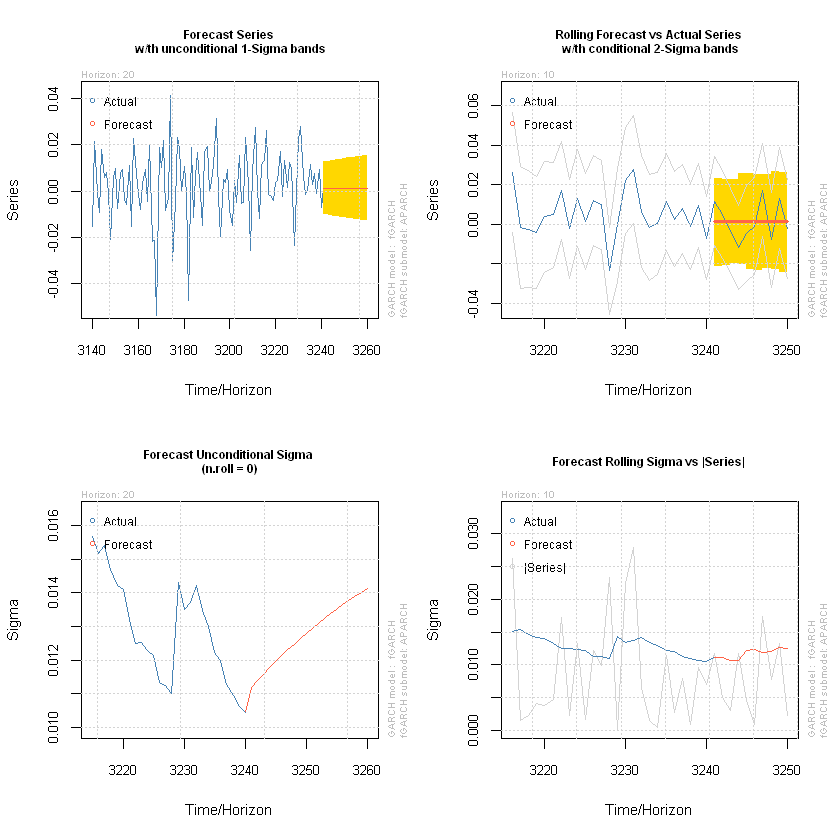

In [49]:
plot(f, which="all")